In [2]:
import numpy as np
import sklearn.cluster
import distance
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
import pandas as pd

#wir lesen die hashtags aus iteration 2 ein, diese csv enthaelt alle vorkommenden hashtags(also mit duplikaten)<-wichtig, da vectorizer die haeufigkeit analysiert
df=pd.read_csv("/home/franko/Iter3/hash.csv", names=['name'], delimiter=';')

#zunaechst werden die hashtags in einer liste gespeichert
column = []
for i in df['name']:
    for j in i.split():
        if j not in column:
           column.append(j)


vectorizer = TfidfVectorizer(lowercase=True) #vectorisiert text string zu numerisch

X = vectorizer.fit_transform(column)#analysiert die haeufigkeit der auftretenden hashtags und erstellt eine Matrix

truncated = TruncatedSVD(n_components=2, n_iter=10).fit_transform(X)#SVD reduziert die Anzahl der Dimensionen

#hier wird die Anzahl der Dimensionen nochmal auf 2 reduziert (fuer plot notwendig)
tsne = TSNE(n_components=2, random_state=3).fit_transform(truncated)
print(tsne)


[[  9.73671355e+00   1.82174057e+01]
 [  3.57161000e+00   1.41811435e+01]
 [  2.99842001e+01  -4.79678037e+00]
 [ -1.31703453e+01  -2.30262103e+00]
 [ -2.55656690e+01   4.23608369e+00]
 [  8.45358307e+00   1.17752196e+01]
 [  2.42989598e+01   1.54865925e+01]
 [  1.25874276e+01  -1.87373043e+01]
 [ -3.13717649e+00  -6.91406323e+00]
 [  1.58308056e+00  -1.16604934e+01]
 [ -1.87103177e+00  -1.74724257e+01]
 [  3.00022843e+01   1.49193372e+01]
 [ -1.94243210e+00   2.98751337e+00]
 [  8.02049220e+00  -1.50327721e+01]
 [  9.34864797e+00  -1.33808053e+01]
 [  2.32895309e+01  -1.92138058e+01]
 [  1.86205820e+01  -2.16724265e+01]
 [  1.80216576e+01   2.69796055e+00]
 [ -2.58150619e+01  -8.41132358e+00]
 [ -2.42680514e+01  -8.03327051e+00]
 [ -1.00704567e+01  -8.30737059e+00]
 [  2.60470070e+01   7.94505556e+00]
 [  2.36962797e+01  -1.99596874e+01]
 [  8.89600018e-01   1.09010480e+01]
 [ -1.08996679e+01   8.13521171e+00]
 [  8.75297030e-01  -2.12190530e+01]
 [  6.61980521e+00   2.22881135e+01]
 

In [3]:
cluster=9#wir bestimmen die anzahl der cluster
km = KMeans(n_clusters=cluster).fit_predict(tsne)#kmeans wird auf die haeufigkeitsmatrix mit 2 dimensionen angewendet 

#wir erstellen einen 2 dimensionalen plot der unseren k-means darstellt
plt.scatter(tsne[:, 0], tsne[:, 1], c=km)

#wir erstellen ein dictionary und lassen uns die cluster anzeigen
clusters = {
    0: [], 1: [], 2:[], 3: [], 4: [], 5: [], 6: [], 7:[], 8: [], 9:[],
}
for i, cluster in enumerate(km):
    clusters[cluster].append(df.ix[i, 'name'])

print(clusters)


{0: ['LoveTrumpsHate', 'MAGA', 'iRegistered', 'NationalVoterRegistrationDay', 'SheWon', '1', 'MAGA', 'debatenight', 'Debates2016', 'Benghazi', 'DebateNight', 'debatenight', 'Debate', 'Debates2016', 'DebateNight', 'DebateNight', 'DebateNight', 'DebateNight', 'MAGA', 'FallonTonight', 'LESM', 'AmericaFirst', 'AmericaFirst', 'LaborDay', 'ImWithYou', 'ImWithYou', 'TrumpinEverett', 'RIP', 'ImWithYou', 'WomensEqualityDay', 'Hannity', 'MakeAmericaSafeAgain', 'Diwali', 'TrumpPence16', 'MAGA', 'TrumpPence16', 'ImWithYou', 'RosanellEaton', 'LawandOrder', 'TrumpPence16', 'NeverHillary', 'smallbiz', 'ICYMI', 'CrookedHillary', 'TrumpMovement', 'MakeAmericaGreatAgain', '1', 'ImWithHer', 'DemsInPhilly', 'ImWithHer', 'DemsInPhilly', 'DemsInPhilly', 'DemConvention', 'DemsInPhilly', 'WeMadeHistory', 'DemsInPhilly'], 1: ['NationalVoterRegistrationDay', 'VoterRegistrationDay', 'AmericaFirst', 'DebateNight', 'Debates2016', 'DebateNight', 'debate', 'DebateNight', 'DebateNight', 'debatenight', 'debatenight', 

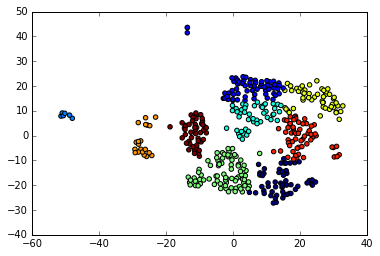

In [4]:
plt.show()